In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

preds = '../outputs/predictions/xgboost_optuna_vals.csv'
test = '../data/processed/processed_all.csv'

df = pd.read_csv(test)
supp = pd.read_csv(preds)

df = df[df['season'] == 2023]
df = df[(df['down'] == 3) | (df['down'] == 4)].reset_index()
supp.reset_index()

data = pd.concat([df, supp], axis=1).drop(columns=['Unnamed: 0'])

In [2]:
data

,index,nflverse_game_id,play_id,possession_team,offense_formation,offense_personnel,defenders_in_box,defense_personnel,players_on_play,offense_players,...,conversion_rate_season,dropbacks,sacks,sack_rate_season,success_plays,total_plays,success_rate_season,y_true,y_pred,y_prob
0,237313,2023_01_ARI_WAS,102,WAS,UNDER_CENTER,"1 C, 1 G, 1 QB, 1 RB, 3 T, 1 TE, 3 WR",6.0,"2 CB, 2 DE, 1 FS, 2 ILB, 2 OLB, 2 SS",00-0034445;00-0036884;00-0038984;00-0035636;00...,00-0034445;00-0033831;00-0037077;00-0038611;00...,...,0.387218,666,48,0.072072,481,1177,0.408666,1.0,1,0.720221
1,237320,2023_01_ARI_WAS,332,ARI,SHOTGUN,"1 C, 1 G, 1 QB, 1 RB, 3 T, 1 TE, 3 WR",6.0,"3 CB, 2 DE, 2 DT, 1 MLB, 1 OLB, 2 SS",00-0035258;00-0033084;00-0036625;00-0039151;00...,00-0035258;00-0034346;00-0033949;00-0033553;00...,...,0.383275,793,46,0.058008,487,1193,0.408215,1.0,0,0.353248
2,237323,2023_01_ARI_WAS,405,ARI,SHOTGUN,"1 C, 1 G, 1 QB, 1 RB, 3 T, 1 TE, 3 WR",6.0,"3 CB, 2 DE, 2 DT, 1 FS, 1 MLB, 2 SS",00-0035258;00-0033084;00-0036625;00-0039151;00...,00-0035258;00-0034346;00-0033949;00-0033553;00...,...,0.383275,793,46,0.058008,487,1193,0.408215,0.0,0,0.210734
3,237326,2023_01_ARI_WAS,580,WAS,SHOTGUN,"1 C, 1 G, 1 QB, 1 RB, 3 T, 2 TE, 2 WR",5.0,"2 CB, 2 DE, 1 DT, 1 FS, 1 ILB, 2 OLB, 2 SS",00-0034445;00-0036884;00-0038984;00-0033563;00...,00-0034445;00-0033831;00-0037077;00-0036328;00...,...,0.387218,666,48,0.072072,481,1177,0.408666,1.0,1,0.592493
4,237335,2023_01_ARI_WAS,935,ARI,SHOTGUN,"1 C, 1 G, 1 QB, 1 RB, 3 T, 1 TE, 3 WR",5.0,"3 CB, 2 DE, 2 DT, 1 MLB, 1 OLB, 2 SS",00-0035258;00-0033084;00-0036625;00-0039151;00...,00-0035258;00-0034346;00-0033949;00-0033553;00...,...,0.383275,793,46,0.058008,487,1193,0.408215,0.0,0,0.246315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8254,272680,2023_22_SF_KC,4502,SF,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",6.0,"3 CB, 2 DE, 2 DT, 2 FS, 1 ILB, 1 SS",00-0032701;00-0036374;00-0037191;00-0037195;00...,00-0032701;00-0036551;00-0037829;00-0037834;00...,...,0.458484,679,37,0.054492,577,1258,0.458665,0.0,0,0.491661
8255,272683,2023_22_SF_KC,4608,KC,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",6.0,"2 CB, 2 DE, 2 DT, 2 FS, 1 ILB, 1 OLB, 1 SS",00-0036623;00-0034573;00-0036563;00-0035717;00...,00-0036623;00-0035149;00-0036660;00-0033873;00...,...,0.511719,890,29,0.032584,669,1323,0.505669,0.0,1,0.783477
8256,272684,2023_22_SF_KC,4630,KC,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 2 TE, 2 WR",6.0,"2 CB, 2 DE, 2 DT, 2 FS, 1 ILB, 1 OLB, 1 SS",00-0036623;00-0034573;00-0036563;00-0035717;00...,00-0036623;00-0035149;00-0036660;00-0033873;00...,...,0.511719,890,29,0.032584,669,1323,0.505669,1.0,1,0.785808
8257,272687,2023_22_SF_KC,4709,KC,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",7.0,"2 CB, 2 DE, 2 DT, 2 FS, 1 ILB, 1 OLB, 1 SS",00-0036623;00-0034573;00-0036563;00-0035717;00...,00-0036623;00-0035149;00-0036660;00-0033873;00...,...,0.511719,890,29,0.032584,669,1323,0.505669,1.0,1,0.507702


<Axes: xlabel='ydstogo', ylabel='y_prob'>

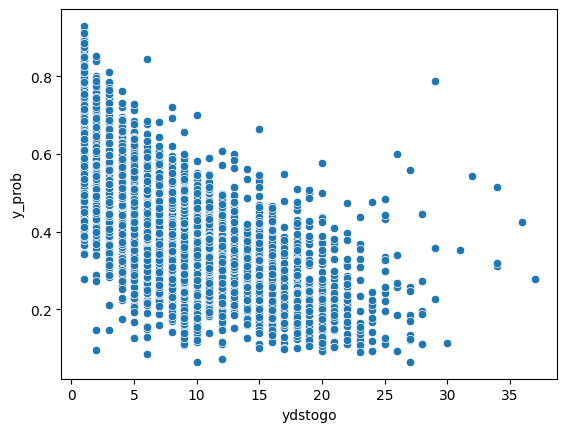

In [3]:
sns.scatterplot(data=data, x='ydstogo',y='y_prob')

In [4]:
print(len(data), len(supp))

8259 8259


<Axes: xlabel='ydstogo', ylabel='Count'>

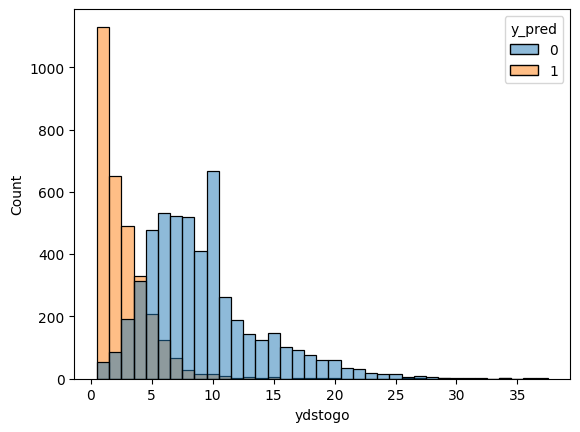

In [5]:
sns.histplot(
    data=data,
    x='ydstogo',
    hue='y_pred',
    bins=range(1, 17),   # 1–15 (16 makes the last bin edge)
    discrete=True
)

<Axes: xlabel='ydstogo', ylabel='Count'>

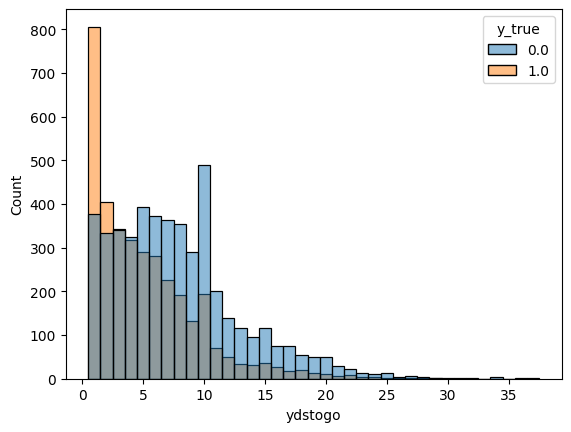

In [6]:
sns.histplot(
    data=data,
    x='ydstogo',
    hue='y_true',
    bins=range(1, 17),   # 1–15 (16 makes the last bin edge)
    discrete=True
)

In [7]:
data[data['ydstogo']==4]

,index,nflverse_game_id,play_id,possession_team,offense_formation,offense_personnel,defenders_in_box,defense_personnel,players_on_play,offense_players,...,conversion_rate_season,dropbacks,sacks,sack_rate_season,success_plays,total_plays,success_rate_season,y_true,y_pred,y_prob
36,237475,2023_01_BUF_NYJ,1428,BUF,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 2 TE, 2 WR",4.0,"3 CB, 2 DE, 1 FS, 1 ILB, 1 NT, 2 OLB, 1 SS",00-0031936;00-0034384;00-0036501;00-0037190;00...,00-0031936;00-0035679;00-0038548;00-0034857;00...,...,0.510288,792,41,0.051768,579,1195,0.484519,1.0,1,0.654420
59,237573,2023_01_CAR_ATL,755,ATL,SHOTGUN,"1 C, 2 G, 1 QB, 2 RB, 2 T, 2 TE, 1 WR",6.0,"2 CB, 2 DE, 2 DT, 1 FS, 2 ILB, 1 OLB, 1 SS",00-0036957;00-0034356;00-0036944;00-0034723;00...,00-0036957;00-0035630;00-0039048;00-0038122;00...,...,0.438356,513,37,0.072125,472,1037,0.455159,1.0,0,0.466302
85,237688,2023_01_CIN_CLE,622,CLE,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",7.0,"3 CB, 2 DE, 1 DT, 1 FS, 1 ILB, 1 NT, 1 OLB, 1 SS",00-0033901;00-0032521;00-0033548;00-0037753;00...,00-0033901;00-0031426;00-0034399;00-0033537;00...,...,0.422535,660,44,0.066667,508,1153,0.440590,1.0,1,0.579325
99,237751,2023_01_CIN_CLE,2942,CIN,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 4 WR",5.0,"3 CB, 2 DE, 1 DT, 1 FS, 1 MLB, 1 OLB, 2 SS",00-0032445;00-0036996;00-0037250;00-0038585;00...,00-0032445;00-0034678;00-0038095;00-0036442;00...,...,0.483636,861,54,0.062718,614,1275,0.481569,0.0,1,0.642232
104,237771,2023_01_CIN_CLE,3642,CIN,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 4 WR",6.0,"3 CB, 2 DE, 1 DT, 1 FS, 3 OLB, 1 SS",00-0032445;00-0034856;00-0036996;00-0037250;00...,00-0032445;00-0034678;00-0038095;00-0036442;00...,...,0.483636,861,54,0.062718,614,1275,0.481569,0.0,1,0.581007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8190,272403,2023_21_DET_SF,3725,SF,SHOTGUN,"2 C, 1 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",6.0,"3 CB, 3 DE, 1 FS, 2 ILB, 2 SS",00-0032151;00-0032701;00-0033930;00-0036307;00...,00-0032151;00-0032701;00-0036551;00-0037834;00...,...,0.458484,679,37,0.054492,577,1258,0.458665,1.0,1,0.686219
8201,272446,2023_21_KC_BAL,823,KC,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",6.0,"2 CB, 1 DT, 2 FS, 2 ILB, 1 NT, 2 OLB, 1 SS",00-0036623;00-0033281;00-0033503;00-0036130;00...,00-0036623;00-0035149;00-0036660;00-0033873;00...,...,0.511719,890,29,0.032584,669,1323,0.505669,1.0,1,0.511988
8210,272476,2023_21_KC_BAL,1677,BAL,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",6.0,"3 CB, 2 DE, 2 DT, 2 FS, 1 ILB, 1 SS",00-0037825;00-0036374;00-0037191;00-0038043;00...,00-0037825;00-0029592;00-0036369;00-0034796;00...,...,0.426923,627,40,0.063796,516,1139,0.453029,0.0,1,0.621410
8241,272618,2023_22_SF_KC,2503,KC,SHOTGUN,"1 C, 2 G, 1 QB, 1 RB, 2 T, 1 TE, 3 WR",6.0,"2 CB, 2 DE, 2 DT, 2 FS, 1 ILB, 1 OLB, 1 SS",00-0036623;00-0034573;00-0036563;00-0035717;00...,00-0036623;00-0035149;00-0036660;00-0033873;00...,...,0.511719,890,29,0.032584,669,1323,0.505669,1.0,1,0.610419


In [8]:
idx = data[data["ydstogo"] == 1]['y_prob'].idxmin()
data.loc[idx].to_dict()
data.iloc[idx]['y_prob']

np.float64(0.278766)

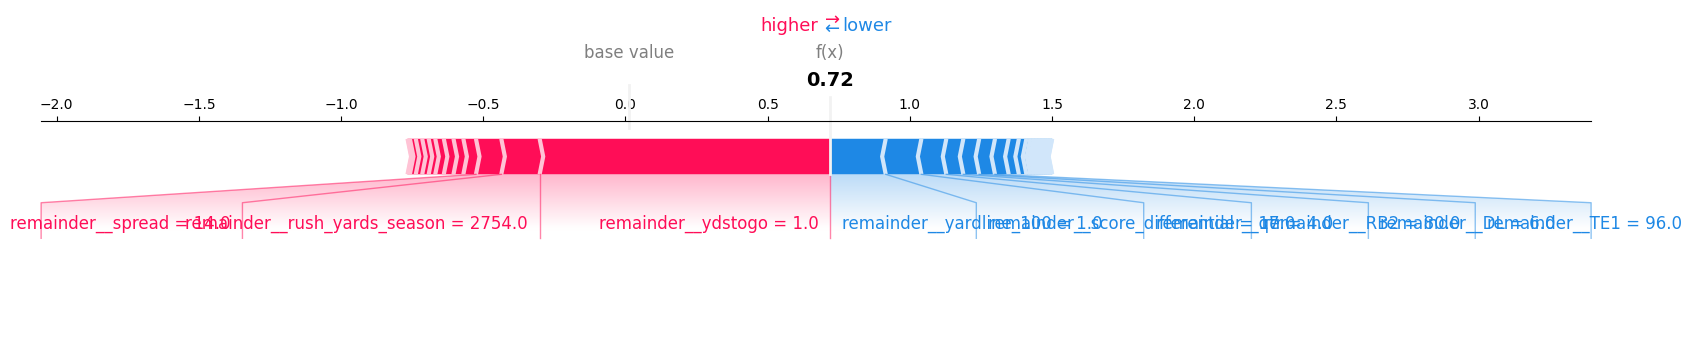

In [9]:
import yaml
import joblib
import shap
import pandas as pd

with open("../cfg/pipeline.yml") as f:
    config = yaml.safe_load(f)

COLS = config["features"]["keep"]

pipeline = joblib.load("../models/xgboost_optuna.joblib")
preproc = pipeline.named_steps["preproc"]
model = pipeline.named_steps["model"]

data = data[COLS]

# transform data
X_pre = preproc.transform(data)

# recover names from ColumnTransformer
feature_names = preproc.get_feature_names_out()

# convert to DataFrame so SHAP works better
X_pre_df = pd.DataFrame(X_pre, columns=feature_names)

# pick the SHAP values for the positive class
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_pre_df)

shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_pre_df.iloc[idx],
    matplotlib=True
)

In [10]:
import shap
import numpy as np

raw_base = explainer.expected_value
raw_shap = shap_values[idx].sum()
raw_output = raw_base + raw_shap

prob_output = 1 / (1 + np.exp(-raw_output))
print(prob_output)  # should match predict_proba

0.6727219


In [11]:
shap_values = explainer.shap_values(X_pre_df)

# If binary classifier, shap_values is usually [class0, class1]
if isinstance(shap_values, list):
    shap_values = shap_values[1]   # positive class only

In [12]:
shap_values

array([[ 0.00024762,  0.02040691,  0.06931215, ..., -0.01601642,
         0.00834792,  0.00894315],
       [ 0.00030414, -0.00718438, -0.01792252, ..., -0.0223734 ,
         0.01654004,  0.02724401],
       [ 0.00029368, -0.00704858, -0.01878161, ..., -0.02472167,
         0.01352378,  0.02804008],
       ...,
       [-0.00054949, -0.00789432, -0.01392055, ...,  0.05862945,
        -0.00550789,  0.04391732],
       [ 0.00021899, -0.00123245, -0.00447968, ..., -0.01114624,
        -0.01958538, -0.00034217],
       [-0.00053787, -0.00821148, -0.01404968, ...,  0.05786738,
        -0.00332116,  0.01526392]], shape=(8259, 35), dtype=float32)

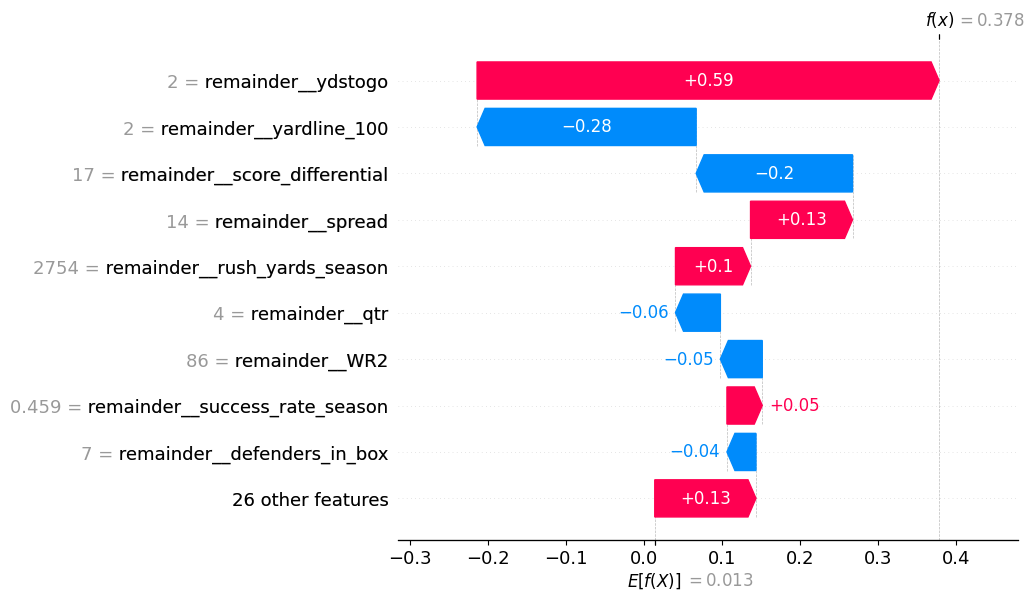

In [13]:
import shap
import numpy as np
# Build Explanation object for ONE sample
idx-=1
exp = shap.Explanation(
    values=shap_values[idx],
    base_values=explainer.expected_value,
    data=X_pre_df.iloc[idx].values,
    feature_names=feature_names
)

shap.plots.waterfall(exp)

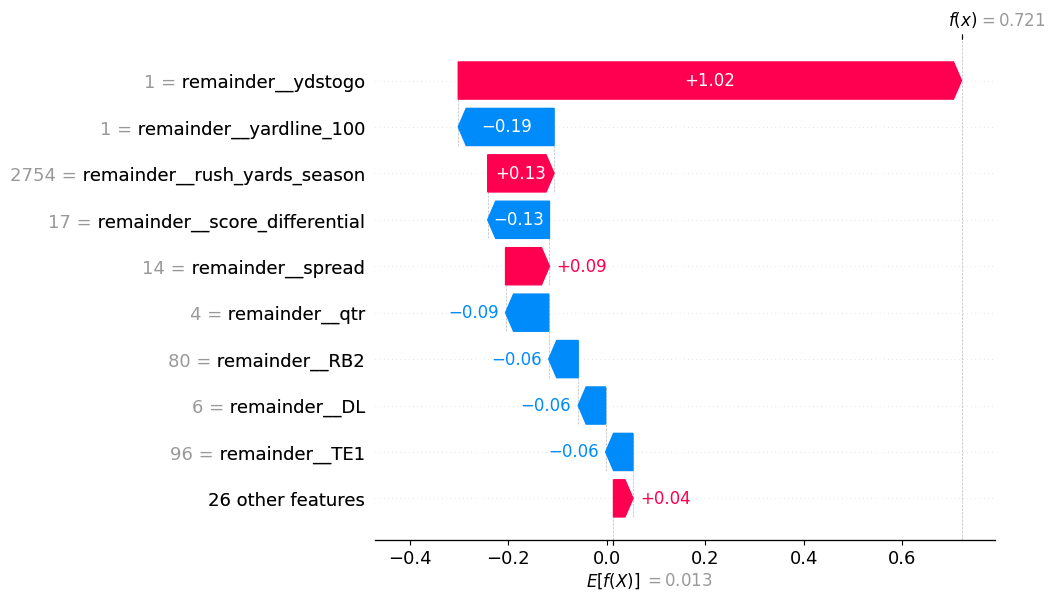

In [14]:
idx+=1
exp = shap.Explanation(
    values=shap_values[idx],
    base_values=explainer.expected_value,
    data=X_pre_df.iloc[idx].values,
    feature_names=feature_names
)

shap.plots.waterfall(exp)

In [18]:
shap_values = explainer.shap_values(X_pre)

print(type(shap_values), len(shap_values))
# if it's a list of length 2, you need to pick the class you care about: # if you want to explain proba[:, 1]

<class 'numpy.ndarray'> 8259


In [19]:
shap_values

array([[ 0.00024762,  0.02040691,  0.06931215, ..., -0.01601642,
         0.00834792,  0.00894315],
       [ 0.00030414, -0.00718438, -0.01792252, ..., -0.0223734 ,
         0.01654004,  0.02724401],
       [ 0.00029368, -0.00704858, -0.01878161, ..., -0.02472167,
         0.01352378,  0.02804008],
       ...,
       [-0.00054949, -0.00789432, -0.01392055, ...,  0.05862945,
        -0.00550789,  0.04391732],
       [ 0.00021899, -0.00123245, -0.00447968, ..., -0.01114624,
        -0.01958538, -0.00034217],
       [-0.00053787, -0.00821148, -0.01404968, ...,  0.05786738,
        -0.00332116,  0.01526392]], shape=(8259, 35), dtype=float32)